# **Loading Stock Data**

In [1]:
from datetime import datetime, timedelta
import yfinance as yf

end_date = datetime.now()
start_date = datetime.now() - timedelta(days = 365 // 2)

ticker_symbols = ['TCS.NS', 'TATAMOTORS.NS', 'INFY.NS', 'ASIANPAINT.NS', 'ONGC.NS']
stock_idx = 0

stock_data = yf.download(ticker_symbols[stock_idx], start=start_date, end=end_date)

stock_data






[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-28,3457.100098,3481.250000,3433.000000,3470.149902,3429.220215,1689195
2023-11-29,3481.000000,3518.000000,3475.800049,3513.750000,3472.306152,1441634
2023-11-30,3499.449951,3516.649902,3481.000000,3487.600098,3446.464600,3266235
2023-12-01,3500.000000,3516.949951,3490.050049,3511.649902,3470.230713,1172141
2023-12-04,3544.649902,3547.800049,3498.000000,3512.449951,3471.021240,1625213
...,...,...,...,...,...,...
2024-05-22,3835.000000,3841.250000,3817.550049,3832.000000,3832.000000,1311168
2024-05-23,3840.949951,3905.000000,3825.500000,3893.449951,3893.449951,2095742
2024-05-24,3878.250000,3883.800049,3844.300049,3849.500000,3849.500000,1309452


In [2]:
from datetime import date
import calendar


today = date.today()
months_back = 6


# Calculate the starting month by subtracting the desired months from today's month
year_offset = months_back // 12
month_offset = months_back % 12
start_month = today.month - month_offset
start_year = today.year - year_offset
if start_month <= 0:
    start_month += 12
    start_year -= 1


# Create the start date object with the 1st day of the calculated month and year
start_date = date(start_year, start_month, 1)


# Calculate the end date by going back exactly 6 months from today
end_year = today.year
end_month = today.month - 1
if end_month <= 0:
    end_month += 12
    end_year -= 1
_, end_day = calendar.monthrange(end_year, end_month)
end_date = date(end_year, end_month, end_day)

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")


Start Date: 2023-11-01
End Date: 2024-04-30


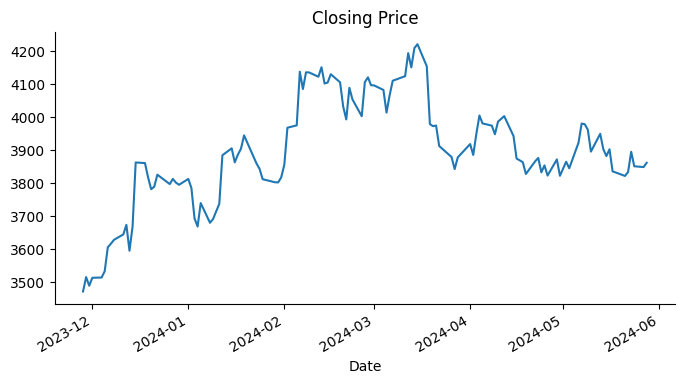

In [3]:
from matplotlib import pyplot as plt
stock_data['Close'].plot(kind='line', figsize=(8, 4), title='Closing Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
# stock_data['6mv'] = stock_data['Close'].rolling(window=3).mean()
# stock_data[['Close', '6mv']].plot(figsize=(8, 4), title='Moving Averages')
# plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
# stock_data['pred'] = stock_data['6mv'].shift(-1)
# stock_data[['Close', '6mv', 'pred']].plot(figsize=(10, 6))
# plt.show()

In [6]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Load and preprocess the data
# sentiment_data = pd.read_csv('sentiment_data.csv', parse_dates=['Date'], index_col='Date')

# # Calculate moving averages
# stock_data['SMA_10'] = stock_data['Close'].rolling(window=10).mean()
# stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
# stock_data['EMA_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()
# stock_data['EMA_200'] = stock_data['Close'].ewm(span=200, adjust=False).mean()

# # Create new features
# stock_data['price_sma_10'] = stock_data['Close'] - stock_data['SMA_10']
# stock_data['price_sma_20_ratio'] = stock_data['Close'] / stock_data['SMA_20']
# stock_data['ema_diff'] = stock_data['EMA_50'] - stock_data['EMA_200']

# # Combine stock data and sentiment data
# data = pd.concat([stock_data, sentiment_data], axis=1)
# data.dropna(inplace=True)

# data

In [7]:
# # Split the data into train and test sets
# train_data = data.iloc[:-30]
# test_data = data.iloc[-30:]

# # Preprocess the data
# scaler = MinMaxScaler()
# train_data = scaler.fit_transform(train_data)
# test_data = scaler.transform(test_data)

# # Split the data into X and y
# X_train = train_data[:, :-1]
# y_train = train_data[:, -1]
# X_test = test_data[:, :-1]
# y_test = test_data[:, -1]

# # Reshape the data for LSTM
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# # Print the shapes
# print('X_train shape:', X_train.shape)
# print('y_train shape:', y_train.shape)
# print('X_test shape:', X_test.shape)
# print('y_test shape:', y_test.shape)


In [8]:
# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))

# # Compile and train the model
# model.compile(optimizer='adam', loss='mse')
# model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


In [9]:
# # Make predictions
# y_pred = model.predict(X_test)

# # Reshape the data for inverse transform
# X_test_flat = X_test.reshape(X_test.shape[0], -1)
# y_pred_flat = y_pred.reshape(-1, 1)
# y_test_flat = y_test.reshape(-1, 1)

# # Inverse transform the predictions and actual values
# y_pred_inv = scaler.inverse_transform(np.concatenate((X_test_flat, y_pred_flat), axis=1))[:, -1]
# y_test_inv = scaler.inverse_transform(np.concatenate((X_test_flat, y_test_flat), axis=1))[:, -1]

# # Evaluate the model
# print('Mean Squared Error:', np.mean((y_pred_inv - y_test_inv) ** 2))

In [10]:
# import matplotlib.pyplot as plt

# # Plot the actual and predicted closing stock prices
# plt.figure(figsize=(12, 6))
# plt.plot(y_test_inv, label='Actual')
# plt.plot(y_pred_inv, label='Predicted')
# plt.xlabel('Time')
# plt.ylabel('Closing Stock Price')
# plt.title('Actual vs. Predicted Closing Stock Prices')
# plt.legend()
# plt.show()

In [11]:
# import matplotlib.pyplot as plt

# # Convert the actual and predicted values to pandas Series
# actual_prices = pd.Series(y_test_inv, index=test_data.index)
# predicted_prices = pd.Series(y_pred_inv, index=test_data.index)

# # Plot the actual and predicted closing stock prices
# plt.figure(figsize=(12, 6))
# plt.plot(actual_prices, label='Actual')
# plt.plot(predicted_prices, label='Predicted')
# plt.xlabel('Date')
# plt.ylabel('Closing Stock Price (INR)')
# plt.title('Actual vs. Predicted Closing Stock Prices for TCS')
# plt.legend()
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.show()

---
# **Method 2**

---



In [12]:
%pip install yfinance
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
C:\Users\user\AppData\Local\Temp\ipykernel_3184\589081190.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Adj Close': 'Close'}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3184\589081190.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_10'] = data['Close'].rolling(window=10).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_3184\589081190.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

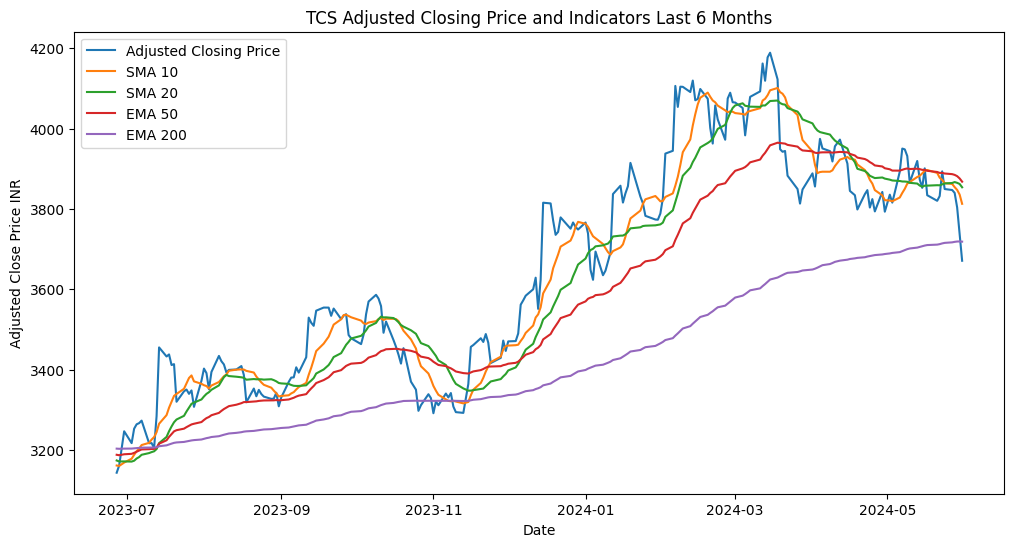

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Download TCS stock data for the last 6 months
ticker = 'TCS.NS'
data = yf.download(ticker, period='1y', interval='1d')

# Use the adjusted closing price
data = data[['Adj Close']]
data.rename(columns={'Adj Close': 'Close'}, inplace=True)

# Calculate simple moving averages and exponential moving averages
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

# Create additional features
data['PRICE_SMA_10'] = data['Close'] - data['SMA_10']
data['PRICE_SMA_20_Ratio'] = data['Close'] / data['SMA_20']
data['EMA_DIFF'] = data['EMA_50'] - data['EMA_200']

data = data.dropna()

# Plot the adjusted closing price
# Plot the adjusted closing price and indicators
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Adjusted Closing Price')
plt.plot(data['SMA_10'], label='SMA 10')
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['EMA_50'], label='EMA 50')
plt.plot(data['EMA_200'], label='EMA 200')
plt.title('TCS Adjusted Closing Price and Indicators Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price INR')
plt.legend()
plt.show()



In [2]:
# combine DataFrame
stock_idx = 0
stock_list = ["TCS", "Tata_Motors", "Infosys", "Asian_Paints", "ONGC"]
sentiment_data = pd.read_csv(rf'../Dataset/{stock_list[stock_idx]}_sentiment_data.csv')
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])
sentiment_data.set_index('Date', inplace=True)

# Combine with the adjusted closing price data
combined_df = data.join(sentiment_data, how='left')

# Fill any missing sentiment scores (if necessary) - for example, with 0 for neutrality
combined_df.fillna({'Score': 0, 'Label': 0}, inplace=True)

print(combined_df.head())
combined_df.to_csv('combined_data.csv')



                  Close       SMA_10       SMA_20       EMA_50      EMA_200  \
Date                                                                          
2023-06-27  3143.309814  3161.290576  3173.781262  3187.948209  3203.273963   
2023-06-28  3161.103516  3160.150171  3171.334985  3186.895476  3202.854357   
2023-06-30  3246.436523  3168.599854  3171.472046  3189.230419  3203.288010   
2023-07-03  3216.993164  3178.175269  3171.034705  3190.319154  3203.424380   
2023-07-04  3252.925293  3187.853882  3173.208801  3192.774297  3203.916926   

            PRICE_SMA_10  PRICE_SMA_20_Ratio   EMA_DIFF  Label  
Date                                                            
2023-06-27    -17.980762            0.990399 -15.325754    0.0  
2023-06-28      0.953345            0.996774 -15.958881    0.0  
2023-06-30     77.836670            1.023637 -14.057591    0.0  
2023-07-03     38.817896            1.014493 -13.105226    0.0  
2023-07-04     65.071411            1.025122 -11.142629 

In [3]:
combined_df.shape

(227, 9)

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Select features and target variable
features = combined_df[['Close','Label','SMA_10', 'SMA_20', 'EMA_50', 'EMA_200']]
target = combined_df['Close']

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Function to create dataset for LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60

X, y = create_dataset(scaled_features, time_step)

# Split the data into training and test sets (80/20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [5]:
X_train.shape[2]

6

In [6]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
# model = Sequential()

# model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(25))
# model.add(Dense(1))


# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train, y_train, batch_size=32, epochs=100)

# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))

# # Compile and train the model
# model.compile(optimizer='adam', loss='mse')
# model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



In [7]:
# # Testing the model using GRU

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.regularizers import l2

# # Define the model architecture
# model = Sequential()
# model.add(GRU(100, return_sequences=True, input_shape=(time_step, X.shape[2])))  # Use GRU instead of LSTM
# model.add(Dropout(0.4))  # Increase dropout rate
# model.add(GRU(100, return_sequences=False))  # Use GRU instead of LSTM
# model.add(Dropout(0.4))  # Increase dropout rate
# model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))  # Increase units in Dense layer
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Define early stopping callback
# early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Increase patience

# # Train the model with early stopping
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
#                     epochs=300, batch_size=64, callbacks=[early_stop])  # Increase epochs

# # Evaluate the model
# train_loss = model.evaluate(X_train, y_train, verbose=0)
# test_loss = model.evaluate(X_test, y_test, verbose=0)

# print("Training Loss:", train_loss)
# print("Testing Loss:", test_loss)

In [8]:
# Testing the model using LSTM and GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define the model architecture
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X.shape[2])))  # LSTM layer
model.add(Dropout(0.3))  # Dropout layer
model.add(GRU(100, return_sequences=False))  # GRU layer
model.add(Dropout(0.3))  # Dropout layer
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))  # Dense layer with L2 regularization
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=250, batch_size=64, callbacks=[early_stop])

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)

f:\Projects\Stock Preditction\src\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/250


3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - loss: 1.0736 - val_loss: 0.6851
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 513ms/step - loss: 0.7179 - val_loss: 0.8397
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - loss: 0.7120 - val_loss: 0.7174
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - loss: 0.6535 - val_loss: 0.6152
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 346ms/step - loss: 0.6493 - val_loss: 0.5975
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - loss: 0.6242 - val_loss: 0.5858
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - loss: 0.5949 - val_loss: 0.5986
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - loss: 0.5784 - val_loss: 0.5902
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - loss: 0.5647 - val_loss: 0.5511
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 695ms/step - loss: 0.5431 - val_loss: 0.5177
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - loss: 0.5263 - val_loss: 0.4991
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 0.5111 - val_loss

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Define the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=200, batch_size=32)
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
#                     epochs=200, batch_size=32, callbacks=[early_stop])

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        42,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100)            │        60,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 325,505 (1.24 MB)

 Trainable params: 108,501 (423.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 217,004 (847.68 KB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 601ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step 


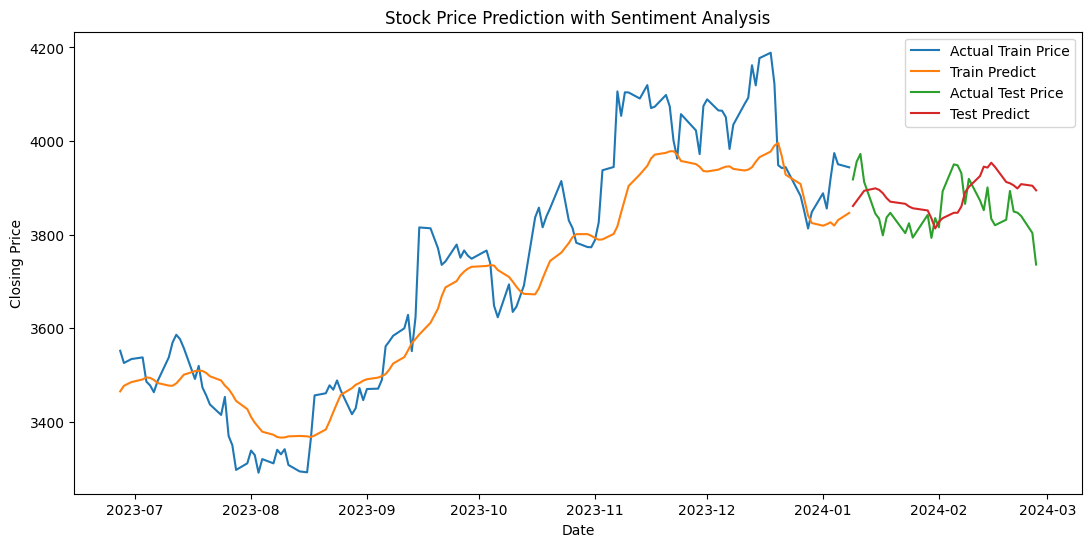

Train MAE: 77.81959440200323
Train MSE: 9574.207387527646
Train RMSE: 97.84787880954623
Train R2: 0.8599296240763239
Test MAE: 61.981035059481
Test MSE: 5097.546507824267
Test RMSE: 71.39710433781097
Test R2: -0.7234438448349845


In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the training and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reshape the predictions to fit the scaler's expectations
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

# Invert scaling to get actual values
train_predict_inverse = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], X_train.shape[2]-1))), axis=1))[:, 0]
test_predict_inverse = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], X_test.shape[2]-1))), axis=1))[:, 0]

# Invert scaling for actual values as well
y_train_inverse = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X_train.shape[2]-1))), axis=1))[:, 0]
y_test_inverse = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2]-1))), axis=1))[:, 0]

# Plot the results
plt.figure(figsize=(13, 6))
plt.plot(combined_df.index[:len(y_train_inverse)], y_train_inverse, label='Actual Train Price')
plt.plot(combined_df.index[:len(train_predict_inverse)], train_predict_inverse, label='Train Predict')
plt.plot(combined_df.index[len(y_train_inverse):len(y_train_inverse) + len(y_test_inverse)], y_test_inverse, label='Actual Test Price')
plt.plot(combined_df.index[len(y_train_inverse):len(y_train_inverse) + len(test_predict_inverse)], test_predict_inverse, label='Test Predict')
plt.title('Stock Price Prediction with Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Calculate evaluation metrics
train_mae = mean_absolute_error(y_train_inverse, train_predict_inverse)
train_mse = mean_squared_error(y_train_inverse, train_predict_inverse)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_inverse, train_predict_inverse)

test_mae = mean_absolute_error(y_test_inverse, test_predict_inverse)
test_mse = mean_squared_error(y_test_inverse, test_predict_inverse)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_inverse, test_predict_inverse)

print(f'Train MAE: {train_mae}')
print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train R2: {train_r2}')

print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test R2: {test_r2}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 
Training Metrics:
MAE: 77.81959440200323
MSE: 9574.207387527646
RMSE: 97.84787880954623
R²: 0.8599296240763239

Testing Metrics:
MAE: 61.981035059481
MSE: 5097.546507824267
RMSE: 71.39710433781097
R²: -0.7234438448349845


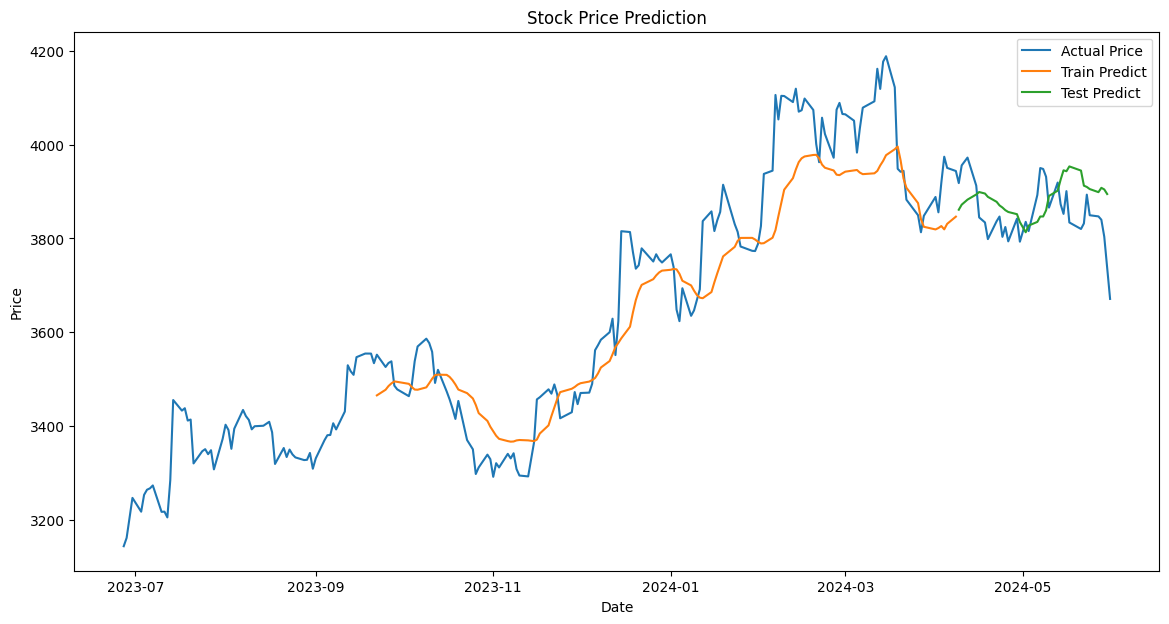

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your data and model are already defined and trained

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], X_train.shape[2] - 1))), axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], X_test.shape[2] - 1))), axis=1))[:, 0]

# Inverse transform the actual values
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X_train.shape[2] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))), axis=1))[:, 0]

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train_actual, train_predict)
train_mse = mean_squared_error(y_train_actual, train_predict)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_actual, train_predict)

# Calculate metrics for testing set
if len(y_test_actual) > 1:
    test_mae = mean_absolute_error(y_test_actual, test_predict)
    test_mse = mean_squared_error(y_test_actual, test_predict)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test_actual, test_predict)
else:
    test_mae = test_mse = test_rmse = test_r2 = np.nan

print(f'Training Metrics:')
print(f'MAE: {train_mae}')
print(f'MSE: {train_mse}')
print(f'RMSE: {train_rmse}')
print(f'R²: {train_r2}')

print(f'\nTesting Metrics:')
print(f'MAE: {test_mae}')
print(f'MSE: {test_mse}')
print(f'RMSE: {test_rmse}')
print(f'R²: {test_r2}')

# Ensure the indices for plotting match the lengths of the predictions
train_plot_indices = combined_df.index[time_step:time_step + len(train_predict)]
test_plot_indices = combined_df.index[time_step + len(train_predict):time_step + len(train_predict) + len(test_predict)]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(combined_df.index, combined_df['Close'], label='Actual Price')
plt.plot(train_plot_indices, train_predict, label='Train Predict')
plt.plot(test_plot_indices, test_predict, label='Test Predict')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [13]:
# Predicting the next 30 days
last_days = scaled_features[-time_step:]

num_features = X.shape[2]
predictions = []

current_input = last_days.reshape(1, time_step, num_features)

for i in range(30):
    next_prediction = model.predict(current_input)
    predictions.append(next_prediction[0, 0])
    print(f"step {i+ 1}")

    next_prediction = next_prediction.reshape(1, 1, 1)
    next_prediction_tiled = np.tile(next_prediction, (1, 1, num_features))

    new_input = np.concatenate((current_input[:, 1:, :], next_prediction_tiled), axis=1)
    current_input = new_input

# Invert predictions to get actual values
predictions = np.array(predictions).reshape(-1, 1)
predictions_full = np.concatenate([predictions, np.zeros((predictions.shape[0], num_features - 1))], axis=1)
predictions = scaler.inverse_transform(predictions_full)[:, 0]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
step 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
step 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
step 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
step 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
step 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
step 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
step 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
step 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
step 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
step 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
step 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
step 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
step 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
step 14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
step 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
step 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
step 17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
step 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
step 19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
step 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
step 21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
ste

3922.8003020061424


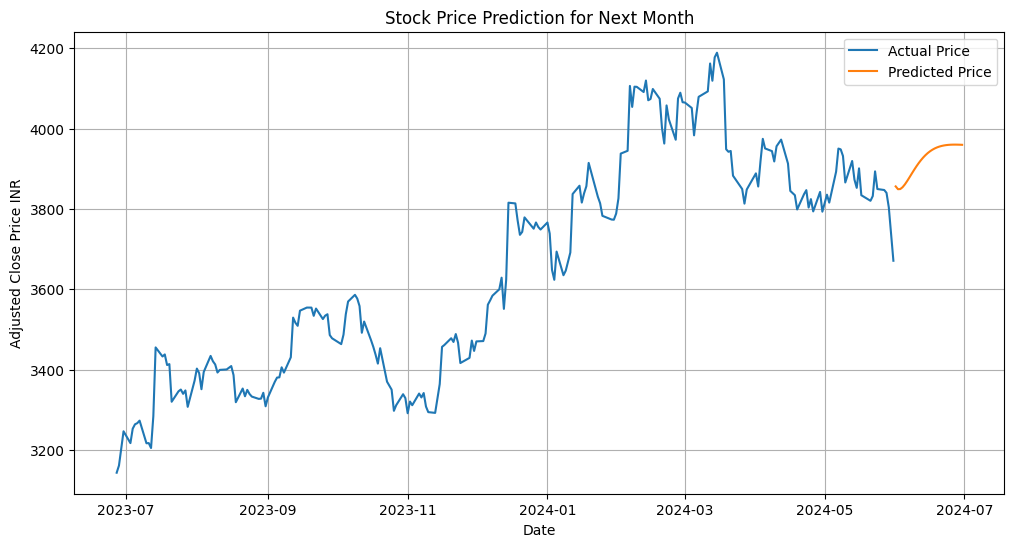

In [14]:
print(predictions.mean())

# Plot the predictions
future_dates = pd.date_range(start=combined_df.index[-1] + pd.Timedelta(days=1), periods=30)
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Close'], label='Actual Price')
plt.plot(future_dates, predictions, label='Predicted Price')
plt.title('Stock Price Prediction for Next Month')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price INR')
plt.legend()
plt.grid()
plt.show()

# **Tuning the model**

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


data = pd.read_csv('combined_data.csv')

# features and target
features = data[['Close', 'Label', 'SMA_10', 'SMA_20', 'EMA_50', 'EMA_200']]
target = data['Close']

# Scaling of the features and target separately
feature_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = feature_scaler.fit_transform(features)

target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Combine scaled features and target to create the dataset for LSTM
scaled_data = np.hstack((scaled_target, scaled_features[:, 1:]))

# Function to create dataset for LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X.shape[2])))  # LSTM layer
    model.add(Dropout(0.3))  # Dropout layer
    model.add(GRU(100, return_sequences=False))  # GRU layer
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))  # Dense layer with L2 regularization
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping callback
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=5, batch_size=64, callbacks=[early_stop])
    # Evaluate the model
    predictions = model.predict(X_test)
    predictions = target_scaler.inverse_transform(predictions)

    # Inverse transform actual values
    y_test_scaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate performance metrics
    mae = mean_absolute_error(y_test_scaled, predictions)
    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_scaled, predictions)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Print average performance metrics
print(f"Average MAE: {np.mean(mae_scores)}")
print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R²: {np.mean(r2_scores)}")


f:\Projects\Stock Preditction\src\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - loss: 0.9408 - val_loss: 0.6890
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - loss: 0.7122 - val_loss: 0.6494
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - loss: 0.6500 - val_loss: 0.6302
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 0.6405 - val_loss: 0.6073
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - loss: 0.6163 - val_loss: 0.5831
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 836ms/step


f:\Projects\Stock Preditction\src\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 725ms/step - loss: 1.1117 - val_loss: 0.7420
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - loss: 0.7123 - val_loss: 0.6869
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.7040 - val_loss: 0.6607
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - loss: 0.6575 - val_loss: 0.6191
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - loss: 0.6238 - val_loss: 0.6180
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/stepWARNING:tensorflow:5 out of the last 44 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002563BD8B060> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessa

f:\Projects\Stock Preditction\src\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 666ms/step - loss: 1.2037 - val_loss: 0.7894
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - loss: 0.7782 - val_loss: 0.6682
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - loss: 0.6734 - val_loss: 0.6523
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 0.6410 - val_loss: 0.6181
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - loss: 0.6268 - val_loss: 0.6145
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 777ms/step


f:\Projects\Stock Preditction\src\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 679ms/step - loss: 0.8994 - val_loss: 0.7360
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - loss: 0.7505 - val_loss: 0.6500
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - loss: 0.6588 - val_loss: 0.6414
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - loss: 0.6521 - val_loss: 0.6217
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - loss: 0.6273 - val_loss: 0.5904
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 799ms/step


f:\Projects\Stock Preditction\src\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 633ms/step - loss: 1.1141 - val_loss: 0.7271
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 0.7125 - val_loss: 0.7496
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - loss: 0.7457 - val_loss: 0.6433
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - loss: 0.6548 - val_loss: 0.6699
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 0.6612 - val_loss: 0.6416
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 843ms/step
Average MAE: 141.77593230385193
Average MSE: 31009.698510068887
Average RMSE: 168.9912658214919
Average R²: 0.46652202597105674
